<a href="https://colab.research.google.com/github/ajitg25/IC_HACK_22/blob/main/ich.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.python.keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ayush8sharma","key":"aac3c8f9655343ca1b6b41196e9120bb"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           6559        199  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts            McDonald's India : Menu Nutrition Dataset             5KB  2022-07-28 17:08:52           5148        180  0.9411765        
arianazmoudeh/airbnbopendata                                   Airbnb Open Data                                     10MB  2022-08-01 15:58:10           3362        102  0.9705882        
iamsouravbanerjee/world-population-dataset                     Wo

In [ ]:
!kaggle datasets download -d prathumarikeri/american-sign-language-09az

 99% 979M/993M [00:32<00:00, 35.8MB/s]
100% 993M/993M [00:32<00:00, 32.5MB/s]


In [ ]:
!unzip american-sign-language-09az.zip

Streaming output truncated to the last 5000 lines.
  inflating: American/x/X871 copy.jpg  
  inflating: American/x/X871.jpg     
  inflating: American/x/X872 copy.jpg  
  inflating: American/x/X872.jpg     
  inflating: American/x/X873 copy.jpg  
  inflating: American/x/X873.jpg     
  inflating: American/x/X874 copy.jpg  
  inflating: American/x/X874.jpg     
  inflating: American/x/X875 copy.jpg  
  inflating: American/x/X875.jpg     
  inflating: American/x/X876 copy.jpg  
  inflating: American/x/X876.jpg     
  inflating: American/x/X877 copy.jpg  
  inflating: American/x/X877.jpg     
  inflating: American/x/X878 copy.jpg  
  inflating: American/x/X878.jpg     
  inflating: American/x/X879 copy.jpg  
  inflating: American/x/X879.jpg     
  inflating: American/x/X880 copy.jpg  
  inflating: American/x/X880.jpg     
  inflating: American/x/X881 copy.jpg  
  inflating: American/x/X881.jpg     
  inflating: American/x/X882 copy.jpg  
  inflating: American/x/X882.jpg     
  inflating: 

In [ ]:
import numpy as np
import os 
import cv2
import shutil
import random as rn 
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir="/content/American"

In [ ]:
print(os.listdir(data_dir))

['y', 'b', 'x', 'g', '9', 'h', 't', '3', 'v', 'c', 'k', '0', 'o', 'r', 'p', '5', 'f', 'e', 'i', 'n', 'm', '4', '7', 's', 'z', 'j', 'w', 'q', '1', 'a', '6', 'l', 'd', '8', 'u', '2']


In [ ]:
batch_size=256
img_height=200
img_width=200

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 142261 files belonging to 36 classes.
Using 113809 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 142261 files belonging to 36 classes.
Using 28452 files for validation.


In [ ]:
print(val_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [ ]:
class_names = val_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


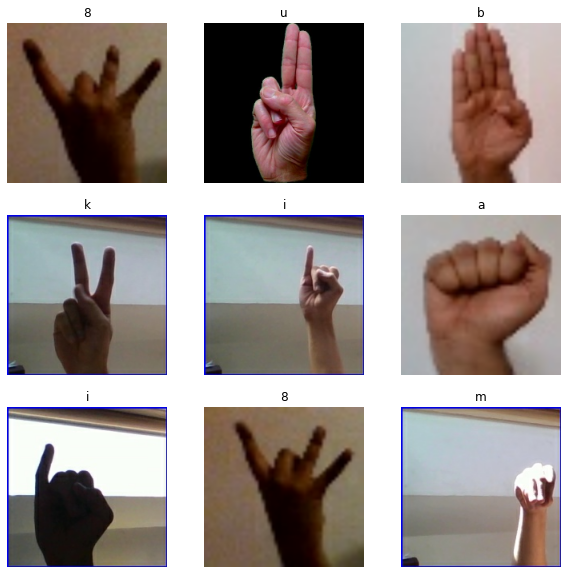

In [ ]:
#visualizing the data
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(256, 200, 200, 3)
(256,)


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
print(data_augmentation)

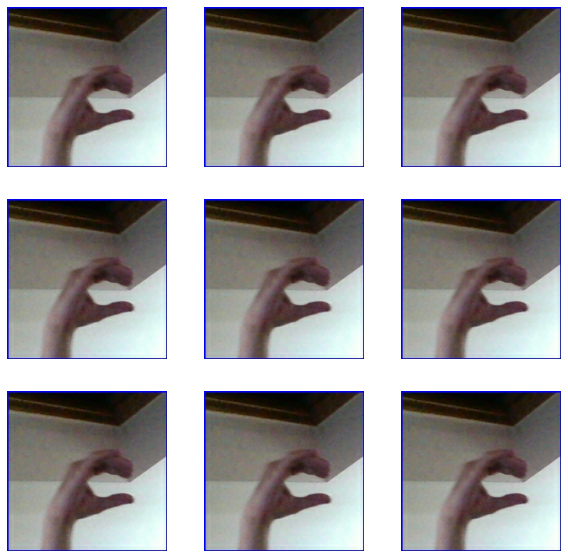

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes=36
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                  

In [ ]:
#creating the model
num_classes = 36
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
445/445 [==============================] - 151s 304ms/step - loss: 0.5839 - accuracy: 0.8327 - val_loss: 0.0671 - val_accuracy: 0.9821
Epoch 2/10
445/445 [==============================] - 132s 295ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.0297 - val_accuracy: 0.9915
Epoch 3/10
445/445 [==============================] - 132s 293ms/step - loss: 0.0185 - accuracy: 0.9945 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 4/10
445/445 [==============================] - 132s 293ms/step - loss: 0.0097 - accuracy: 0.9970 - val_loss: 0.0193 - val_accuracy: 0.9936
Epoch 5/10
445/445 [==============================] - 131s 292ms/step - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0087 - val_accuracy: 0.9978
Epoch 6/10
445/445 [==============================] - 131s 293ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.0126 - val_accuracy: 0.9961
Epoch 7/10
445/445 [==============================] - 131s 291ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0128 -

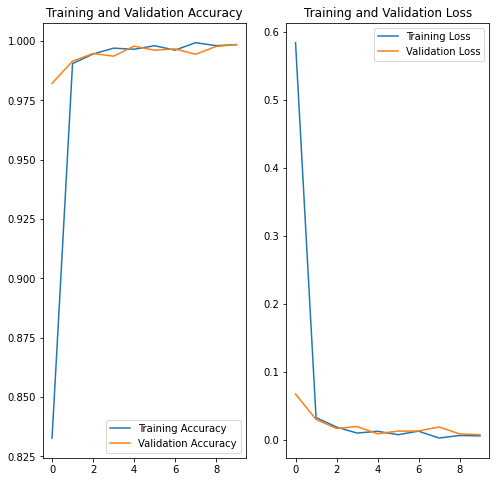

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pickle_in = open("class.pkl","rb")
classifier=pickle.load(pickle_in)

In [5]:
import pickle
pickle_out = open("class.pkl","rb")
pickle.dump(model, pickle_out)
pickle_out.close()

NameError: ignored

In [ ]:
#deployment
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

In [ ]:
for fn in uploaded.keys():
  dic=dict()
  dic={10:"a",11:"b",12:"c",13:"d",14:"e",15:"f",16:"g",17:"h",18:"i",19:"j",20:"k",21:"l",22:"m",23:"n",24:"o",25:"p",26:"q",27:"r",28:"s",29:"t",30:"u",31:"v",32:"w",33:"x",34:"y",35:"z"}
  
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(200, 200))
  
  x=image.img_to_array(img)
  test_img=np.expand_dims(x, axis=0)
  
  
  result = model.predict(test_img)
  pred = np.argmax(result) # get the index of max value

  print(pred-1)
  z= pred-1
  if(z>=10):
    print(dic[z])

In [ ]:
import cv2

In [ ]:
for fn in uploaded.keys():
  dic={10:"a",11:"b",12:"c",13:"d",14:"e",15:"f",16:"g",17:"h",18:"i",19:"j",20:"k",21:"l",22:"m",23:"n",24:"o",25:"p",26:"q",27:"r",28:"s",29:"t",30:"u",31:"v",32:"w",33:"x",34:"y",35:"z"}

  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(200, 200))
  
  x=image.img_to_array(img)
  test_img=np.expand_dims(x, axis=0)
  
  # print(x)
  result = model.predict(test_img)
  pred = np.argmax(result) # get the index of max value

  print(pred)
  final = pred
  if(final>=10):
    print(dic[final])

In [8]:
import pickle
pickle_in = open("class.pkl","rb")
classi=pickle.Unpickler(pickle_in)
scores = classi.load()

EOFError: ignored

In [3]:
import pickle
print(pickle.__version__)

AttributeError: ignored

In [ ]:
src=cv2.imread(path)